<a href="https://colab.research.google.com/github/Alfikriangelo/MachineLearningTasks/blob/main/12thWeekTask/TensorFlow_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [23]:
# Load MNIST Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [24]:
def build_model(kernel_size, pooling_type, optimizer_type):
    model = models.Sequential([
        layers.Conv2D(32, kernel_size, activation='relu', padding='same', input_shape=(28, 28, 1)),
        pooling_type((2, 2)),
        layers.Conv2D(64, kernel_size, activation='relu', padding='same'),
        pooling_type((2, 2)),
        layers.Conv2D(64, kernel_size, activation='relu', padding='same'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer_type,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


In [25]:
# Parameters to Compare
kernel_sizes = [(3, 3), (5, 5)]
pooling_types = [layers.MaxPooling2D, layers.AveragePooling2D]
optimizers_to_compare = [optimizers.SGD, optimizers.RMSprop, optimizers.Adam]
epochs_list = [5, 100]

In [26]:
# Callback for Early Stopping and Learning Rate Scheduler
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3)
]

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.8557 - loss: 0.4863 - val_accuracy: 0.9537 - val_loss: 0.1542 - learning_rate: 0.0100
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9612 - loss: 0.1255 - val_accuracy: 0.9702 - val_loss: 0.0929 - learning_rate: 0.0100
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9732 - loss: 0.0857 - val_accuracy: 0.9766 - val_loss: 0.0689 - learning_rate: 0.0100
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9787 - loss: 0.0677 - val_accuracy: 0.9826 - val_loss: 0.0567 - learning_rate: 0.0100
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9820 - loss: 0.0576 - val_accuracy: 0.9867 - val_loss: 0.0429 - learning_rate: 0.0100
Test accuracy: 0.9867


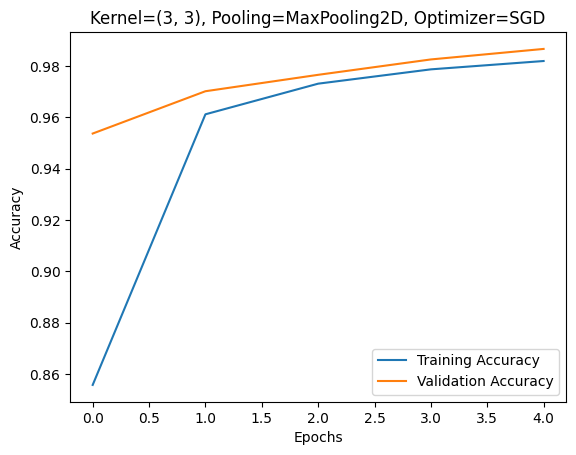

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=SGD, epochs=100
Epoch 1/100
1875/1875 - 6s - 3ms/step - accuracy: 0.8379 - loss: 0.5394 - val_accuracy: 0.9563 - val_loss: 0.1425 - learning_rate: 0.0100
Epoch 2/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9624 - loss: 0.1244 - val_accuracy: 0.9711 - val_loss: 0.0887 - learning_rate: 0.0100
Epoch 3/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9748 - loss: 0.0834 - val_accuracy: 0.9799 - val_loss: 0.0589 - learning_rate: 0.0100
Epoch 4/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9801 - loss: 0.0660 - val_accuracy: 0.9846 - val_loss: 0.0507 - learning_rate: 0.0100
Epoch 5/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9836 - loss: 0.0539 - val_accuracy: 0.9857 - val_loss: 0.0443 - learning_rate: 0.0100
Test accuracy: 0.9563


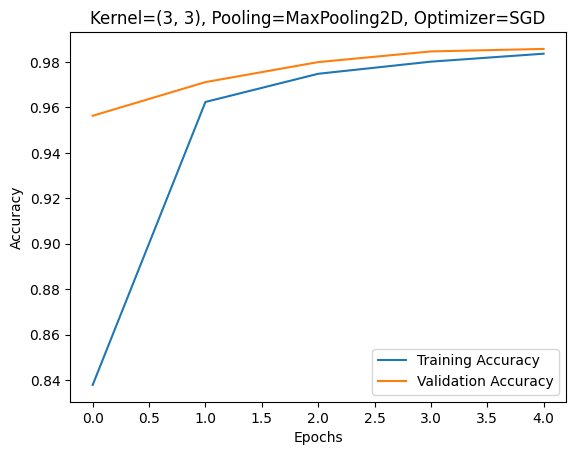

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9616 - loss: 0.1241 - val_accuracy: 0.9876 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9888 - loss: 0.0377 - val_accuracy: 0.9897 - val_loss: 0.0332 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9922 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9939 - loss: 0.0202 - val_accuracy: 0.9909 - val_loss: 0.0313 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9956 - loss: 0.0165 - val_accuracy: 0.9924 - val_loss: 0.0278 - learning_rate: 0.0010
Test accuracy: 0.9922


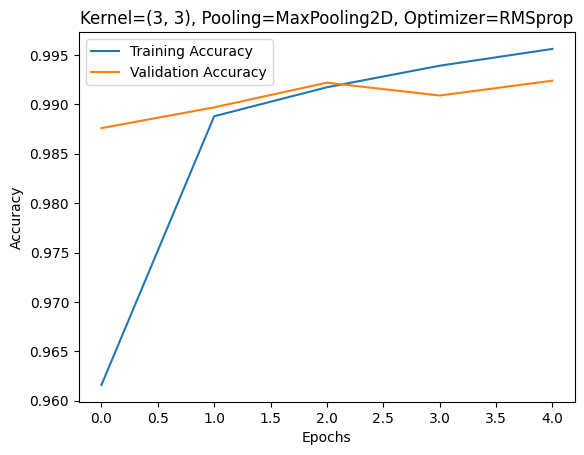

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=100
Epoch 1/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9612 - loss: 0.1234 - val_accuracy: 0.9871 - val_loss: 0.0382 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 9s - 5ms/step - accuracy: 0.9882 - loss: 0.0385 - val_accuracy: 0.9912 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9918 - loss: 0.0269 - val_accuracy: 0.9894 - val_loss: 0.0358 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9941 - loss: 0.0197 - val_accuracy: 0.9922 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9954 - loss: 0.0169 - val_accuracy: 0.9935 - val_loss: 0.0245 - learning_rate: 0.0010
Epoch 6/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9964 - loss: 0.0132 - val_accuracy: 0.9914 - val_loss: 0.0336 - learning_rate: 0.0010
Epoch 7/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9967 - loss: 0.0107 - val_acc

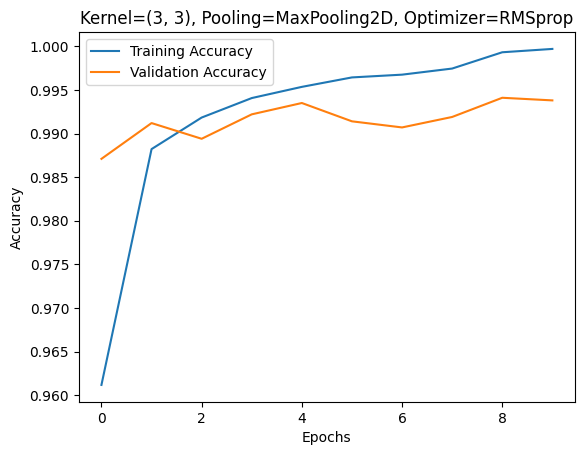

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9631 - loss: 0.1207 - val_accuracy: 0.9878 - val_loss: 0.0366 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9877 - loss: 0.0407 - val_accuracy: 0.9867 - val_loss: 0.0425 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9915 - loss: 0.0287 - val_accuracy: 0.9913 - val_loss: 0.0265 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9928 - loss: 0.0220 - val_accuracy: 0.9903 - val_loss: 0.0351 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9943 - loss: 0.0177 - val_accuracy: 0.9931 - val_loss: 0.0247 - learning_rate: 0.0010
Test accuracy: 0.9878


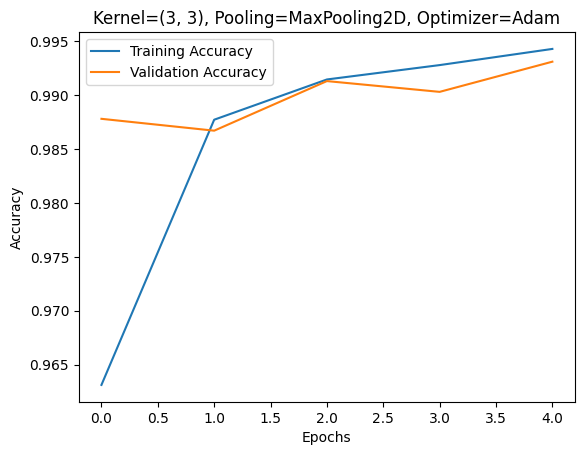

Training with kernel_size=(3, 3), pooling_type=MaxPooling2D, optimizer=Adam, epochs=100
Epoch 1/100
1875/1875 - 26s - 14ms/step - accuracy: 0.9617 - loss: 0.1220 - val_accuracy: 0.9812 - val_loss: 0.0587 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9879 - loss: 0.0413 - val_accuracy: 0.9912 - val_loss: 0.0269 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9915 - loss: 0.0271 - val_accuracy: 0.9887 - val_loss: 0.0364 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 10s - 5ms/step - accuracy: 0.9936 - loss: 0.0214 - val_accuracy: 0.9918 - val_loss: 0.0258 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 5s - 2ms/step - accuracy: 0.9949 - loss: 0.0164 - val_accuracy: 0.9909 - val_loss: 0.0324 - learning_rate: 0.0010
Test accuracy: 0.9812


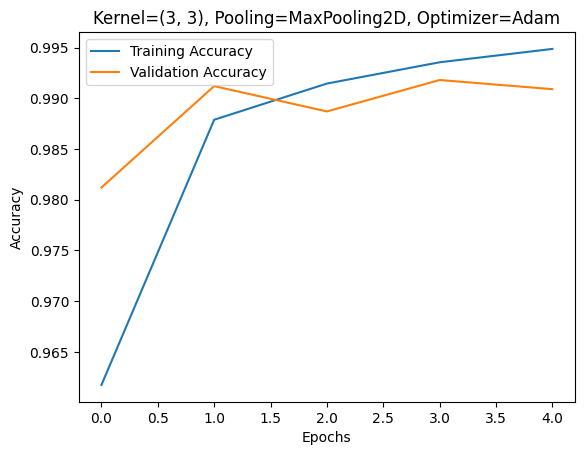

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1875/1875 - 6s - 3ms/step - accuracy: 0.7823 - loss: 0.7529 - val_accuracy: 0.9322 - val_loss: 0.2291 - learning_rate: 0.0100
Epoch 2/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9423 - loss: 0.1895 - val_accuracy: 0.9579 - val_loss: 0.1389 - learning_rate: 0.0100
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9595 - loss: 0.1308 - val_accuracy: 0.9673 - val_loss: 0.1058 - learning_rate: 0.0100
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9694 - loss: 0.1010 - val_accuracy: 0.9734 - val_loss: 0.0816 - learning_rate: 0.0100
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9744 - loss: 0.0843 - val_accuracy: 0.9750 - val_loss: 0.0742 - learning_rate: 0.0100
Test accuracy: 0.9322


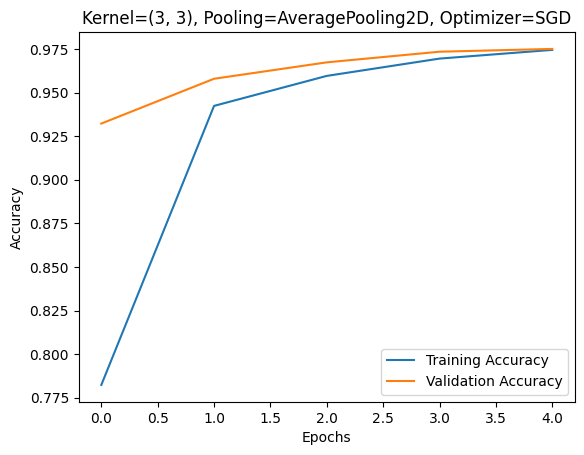

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=SGD, epochs=100
Epoch 1/100
1875/1875 - 6s - 3ms/step - accuracy: 0.7983 - loss: 0.6691 - val_accuracy: 0.9306 - val_loss: 0.2231 - learning_rate: 0.0100
Epoch 2/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9438 - loss: 0.1884 - val_accuracy: 0.9555 - val_loss: 0.1435 - learning_rate: 0.0100
Epoch 3/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9602 - loss: 0.1312 - val_accuracy: 0.9645 - val_loss: 0.1115 - learning_rate: 0.0100
Epoch 4/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9683 - loss: 0.1031 - val_accuracy: 0.9730 - val_loss: 0.0942 - learning_rate: 0.0100
Epoch 5/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9735 - loss: 0.0857 - val_accuracy: 0.9730 - val_loss: 0.0830 - learning_rate: 0.0100
Test accuracy: 0.9306


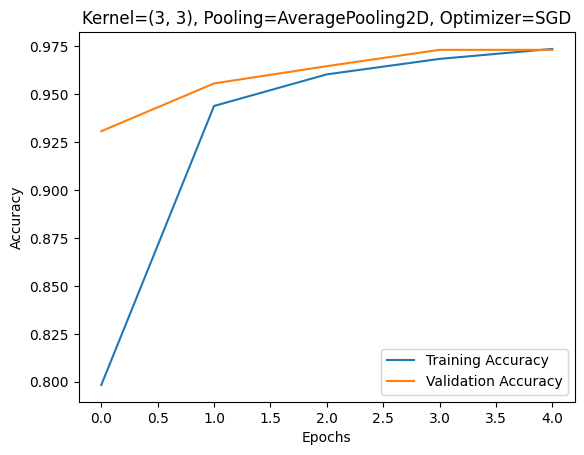

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9542 - loss: 0.1496 - val_accuracy: 0.9866 - val_loss: 0.0406 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9850 - loss: 0.0493 - val_accuracy: 0.9887 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9900 - loss: 0.0337 - val_accuracy: 0.9914 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9921 - loss: 0.0265 - val_accuracy: 0.9875 - val_loss: 0.0432 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 4s - 2ms/step - accuracy: 0.9936 - loss: 0.0212 - val_accuracy: 0.9918 - val_loss: 0.0282 - learning_rate: 0.0010
Test accuracy: 0.9866


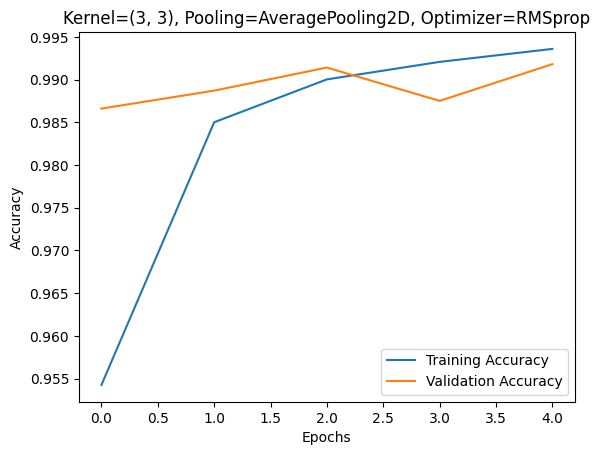

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=100
Epoch 1/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9555 - loss: 0.1471 - val_accuracy: 0.9854 - val_loss: 0.0451 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9858 - loss: 0.0470 - val_accuracy: 0.9887 - val_loss: 0.0371 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9902 - loss: 0.0331 - val_accuracy: 0.9908 - val_loss: 0.0273 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9925 - loss: 0.0257 - val_accuracy: 0.9911 - val_loss: 0.0291 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9939 - loss: 0.0204 - val_accuracy: 0.9915 - val_loss: 0.0293 - learning_rate: 0.0010
Test accuracy: 0.9854


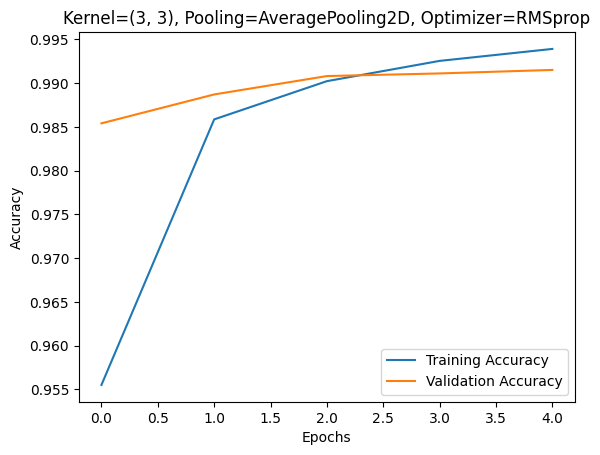

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9554 - loss: 0.1480 - val_accuracy: 0.9853 - val_loss: 0.0476 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9861 - loss: 0.0469 - val_accuracy: 0.9887 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9895 - loss: 0.0325 - val_accuracy: 0.9868 - val_loss: 0.0376 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9921 - loss: 0.0245 - val_accuracy: 0.9888 - val_loss: 0.0368 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.9914 - val_loss: 0.0266 - learning_rate: 0.0010
Test accuracy: 0.9853


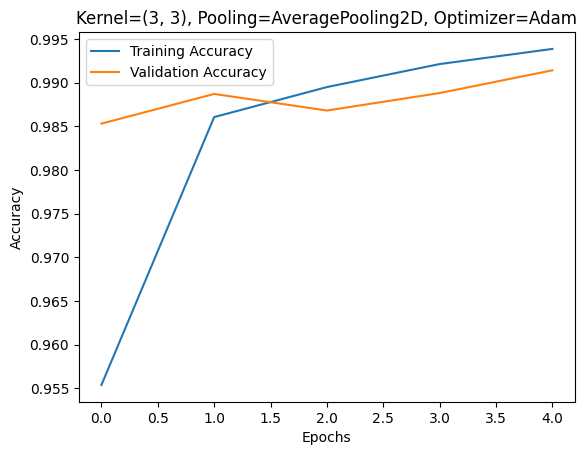

Training with kernel_size=(3, 3), pooling_type=AveragePooling2D, optimizer=Adam, epochs=100
Epoch 1/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9551 - loss: 0.1467 - val_accuracy: 0.9814 - val_loss: 0.0529 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9849 - loss: 0.0488 - val_accuracy: 0.9863 - val_loss: 0.0423 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9894 - val_loss: 0.0344 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9922 - loss: 0.0255 - val_accuracy: 0.9917 - val_loss: 0.0262 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 4s - 2ms/step - accuracy: 0.9934 - loss: 0.0205 - val_accuracy: 0.9904 - val_loss: 0.0329 - learning_rate: 0.0010
Test accuracy: 0.9814


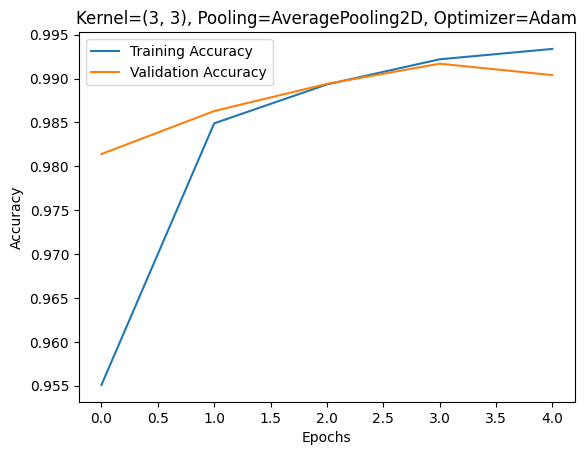

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.8685 - loss: 0.4340 - val_accuracy: 0.9639 - val_loss: 0.1139 - learning_rate: 0.0100
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9694 - loss: 0.1022 - val_accuracy: 0.9777 - val_loss: 0.0722 - learning_rate: 0.0100
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9780 - loss: 0.0724 - val_accuracy: 0.9818 - val_loss: 0.0537 - learning_rate: 0.0100
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9823 - loss: 0.0573 - val_accuracy: 0.9849 - val_loss: 0.0447 - learning_rate: 0.0100
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9852 - loss: 0.0482 - val_accuracy: 0.9855 - val_loss: 0.0417 - learning_rate: 0.0100
Test accuracy: 0.9639


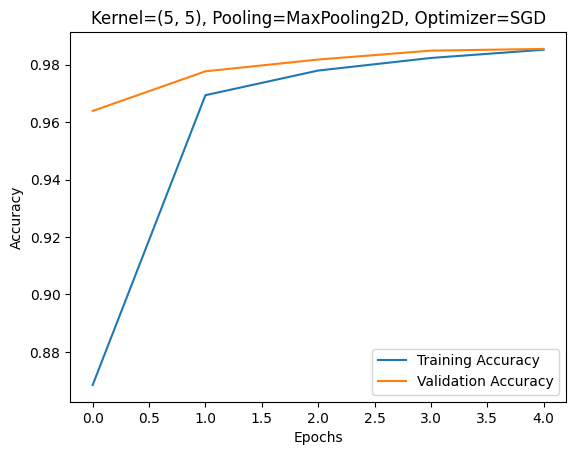

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=SGD, epochs=100
Epoch 1/100
1875/1875 - 7s - 4ms/step - accuracy: 0.8667 - loss: 0.4501 - val_accuracy: 0.9641 - val_loss: 0.1182 - learning_rate: 0.0100
Epoch 2/100
1875/1875 - 5s - 2ms/step - accuracy: 0.9694 - loss: 0.0998 - val_accuracy: 0.9780 - val_loss: 0.0681 - learning_rate: 0.0100
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9792 - loss: 0.0681 - val_accuracy: 0.9813 - val_loss: 0.0593 - learning_rate: 0.0100
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9829 - loss: 0.0547 - val_accuracy: 0.9859 - val_loss: 0.0438 - learning_rate: 0.0100
Epoch 5/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9861 - loss: 0.0460 - val_accuracy: 0.9870 - val_loss: 0.0390 - learning_rate: 0.0100
Test accuracy: 0.9641


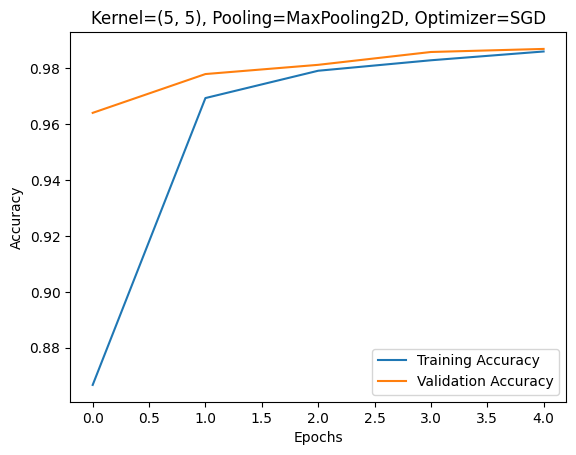

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9649 - loss: 0.1115 - val_accuracy: 0.9846 - val_loss: 0.0458 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9894 - loss: 0.0357 - val_accuracy: 0.9893 - val_loss: 0.0383 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9927 - loss: 0.0257 - val_accuracy: 0.9906 - val_loss: 0.0326 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 10s - 5ms/step - accuracy: 0.9947 - loss: 0.0199 - val_accuracy: 0.9915 - val_loss: 0.0305 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9960 - loss: 0.0156 - val_accuracy: 0.9906 - val_loss: 0.0402 - learning_rate: 0.0010
Test accuracy: 0.9846


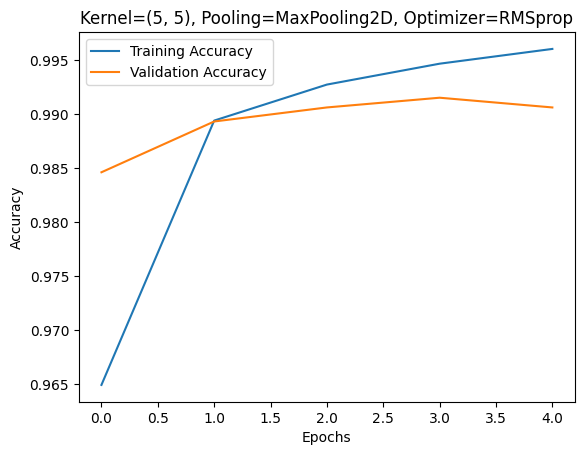

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=RMSprop, epochs=100
Epoch 1/100
1875/1875 - 7s - 4ms/step - accuracy: 0.9643 - loss: 0.1155 - val_accuracy: 0.9900 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 9s - 5ms/step - accuracy: 0.9895 - loss: 0.0366 - val_accuracy: 0.9915 - val_loss: 0.0281 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 10s - 5ms/step - accuracy: 0.9929 - loss: 0.0245 - val_accuracy: 0.9928 - val_loss: 0.0267 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9946 - loss: 0.0189 - val_accuracy: 0.9920 - val_loss: 0.0303 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 10s - 6ms/step - accuracy: 0.9959 - loss: 0.0158 - val_accuracy: 0.9914 - val_loss: 0.0297 - learning_rate: 0.0010
Test accuracy: 0.9900


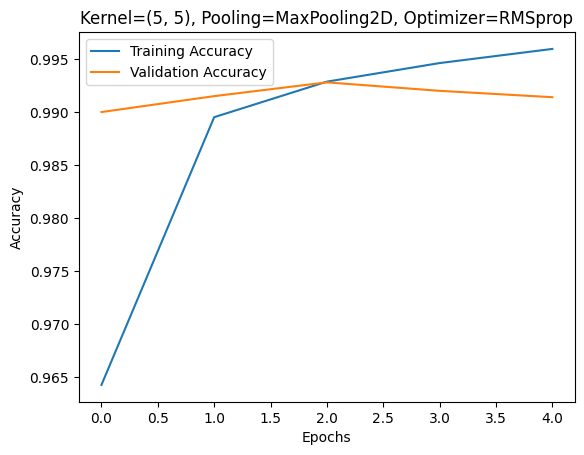

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9630 - loss: 0.1160 - val_accuracy: 0.9844 - val_loss: 0.0461 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9890 - val_loss: 0.0373 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9917 - loss: 0.0271 - val_accuracy: 0.9901 - val_loss: 0.0329 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9940 - loss: 0.0199 - val_accuracy: 0.9923 - val_loss: 0.0282 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9948 - loss: 0.0166 - val_accuracy: 0.9898 - val_loss: 0.0335 - learning_rate: 0.0010
Test accuracy: 0.9844


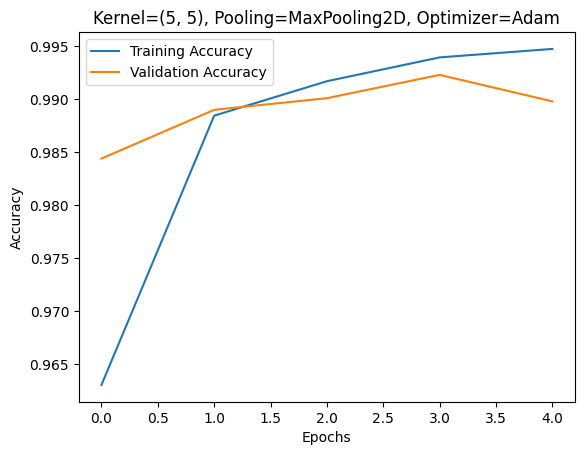

Training with kernel_size=(5, 5), pooling_type=MaxPooling2D, optimizer=Adam, epochs=100
Epoch 1/100
1875/1875 - 9s - 5ms/step - accuracy: 0.9653 - loss: 0.1125 - val_accuracy: 0.9804 - val_loss: 0.0611 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9878 - loss: 0.0385 - val_accuracy: 0.9881 - val_loss: 0.0394 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9917 - loss: 0.0277 - val_accuracy: 0.9915 - val_loss: 0.0254 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9937 - loss: 0.0211 - val_accuracy: 0.9899 - val_loss: 0.0318 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 9s - 5ms/step - accuracy: 0.9954 - loss: 0.0157 - val_accuracy: 0.9888 - val_loss: 0.0413 - learning_rate: 0.0010
Test accuracy: 0.9804


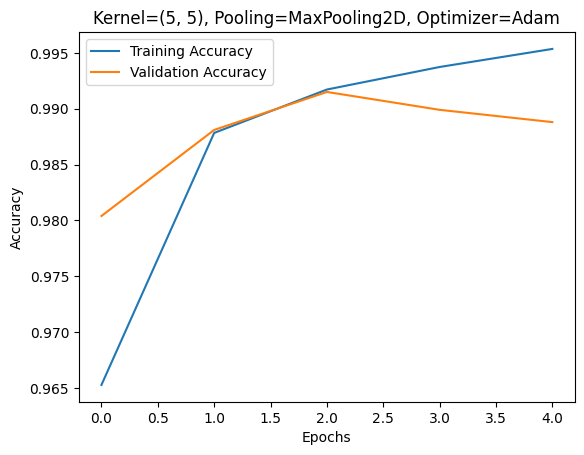

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=SGD, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.8154 - loss: 0.6388 - val_accuracy: 0.9403 - val_loss: 0.2039 - learning_rate: 0.0100
Epoch 2/5
1875/1875 - 5s - 2ms/step - accuracy: 0.9485 - loss: 0.1703 - val_accuracy: 0.9583 - val_loss: 0.1372 - learning_rate: 0.0100
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9638 - loss: 0.1186 - val_accuracy: 0.9648 - val_loss: 0.1169 - learning_rate: 0.0100
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9715 - loss: 0.0929 - val_accuracy: 0.9693 - val_loss: 0.0929 - learning_rate: 0.0100
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9760 - loss: 0.0774 - val_accuracy: 0.9771 - val_loss: 0.0717 - learning_rate: 0.0100
Test accuracy: 0.9403


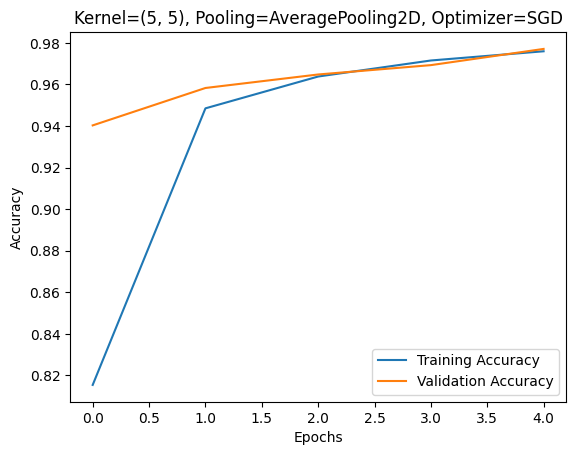

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=SGD, epochs=100
Epoch 1/100
1875/1875 - 6s - 3ms/step - accuracy: 0.8192 - loss: 0.5960 - val_accuracy: 0.9405 - val_loss: 0.1956 - learning_rate: 0.0100
Epoch 2/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9493 - loss: 0.1652 - val_accuracy: 0.9663 - val_loss: 0.1144 - learning_rate: 0.0100
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9643 - loss: 0.1145 - val_accuracy: 0.9681 - val_loss: 0.0993 - learning_rate: 0.0100
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9725 - loss: 0.0902 - val_accuracy: 0.9741 - val_loss: 0.0768 - learning_rate: 0.0100
Epoch 5/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9776 - loss: 0.0740 - val_accuracy: 0.9771 - val_loss: 0.0697 - learning_rate: 0.0100
Test accuracy: 0.9405


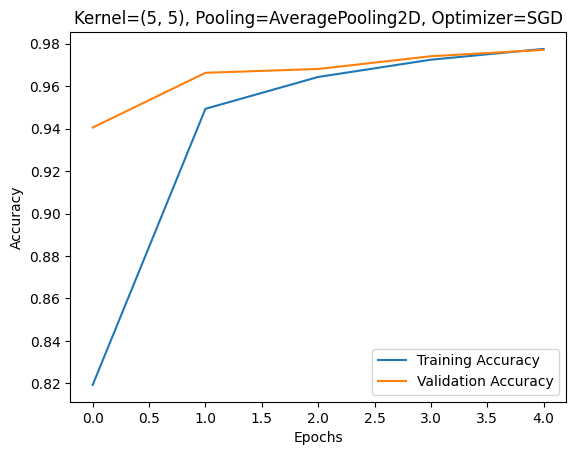

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=5
Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9584 - loss: 0.1349 - val_accuracy: 0.9859 - val_loss: 0.0407 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9878 - loss: 0.0405 - val_accuracy: 0.9891 - val_loss: 0.0367 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9914 - loss: 0.0285 - val_accuracy: 0.9911 - val_loss: 0.0330 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9936 - loss: 0.0215 - val_accuracy: 0.9928 - val_loss: 0.0247 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9950 - loss: 0.0175 - val_accuracy: 0.9909 - val_loss: 0.0309 - learning_rate: 0.0010
Test accuracy: 0.9859


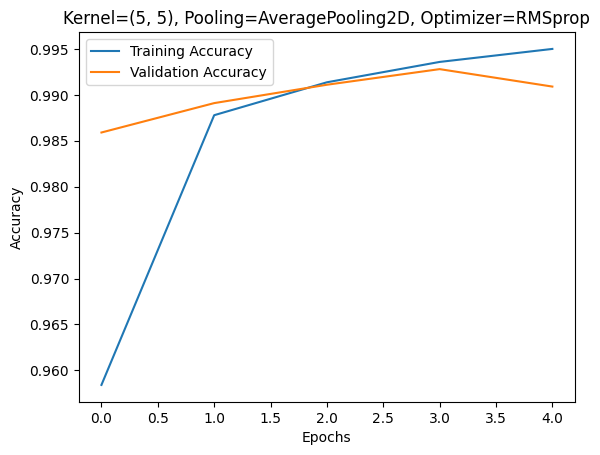

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=RMSprop, epochs=100
Epoch 1/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9569 - loss: 0.1377 - val_accuracy: 0.9874 - val_loss: 0.0387 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 9s - 5ms/step - accuracy: 0.9876 - loss: 0.0414 - val_accuracy: 0.9916 - val_loss: 0.0243 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9915 - loss: 0.0285 - val_accuracy: 0.9907 - val_loss: 0.0314 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9937 - loss: 0.0215 - val_accuracy: 0.9930 - val_loss: 0.0261 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9952 - loss: 0.0167 - val_accuracy: 0.9908 - val_loss: 0.0317 - learning_rate: 0.0010
Epoch 6/100
1875/1875 - 5s - 2ms/step - accuracy: 0.9984 - loss: 0.0058 - val_accuracy: 0.9934 - val_loss: 0.0235 - learning_rate: 1.0000e-04
Epoch 7/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9991 - loss: 0.0038 -

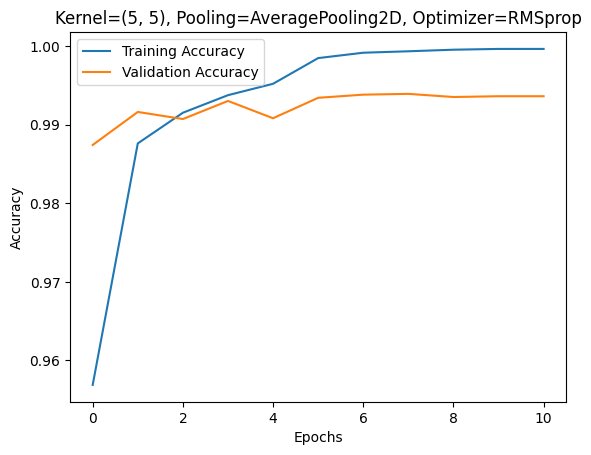

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=Adam, epochs=5
Epoch 1/5
1875/1875 - 9s - 5ms/step - accuracy: 0.9560 - loss: 0.1401 - val_accuracy: 0.9852 - val_loss: 0.0467 - learning_rate: 0.0010
Epoch 2/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9868 - loss: 0.0434 - val_accuracy: 0.9894 - val_loss: 0.0340 - learning_rate: 0.0010
Epoch 3/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9908 - loss: 0.0302 - val_accuracy: 0.9900 - val_loss: 0.0324 - learning_rate: 0.0010
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9928 - loss: 0.0223 - val_accuracy: 0.9909 - val_loss: 0.0285 - learning_rate: 0.0010
Epoch 5/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9945 - loss: 0.0179 - val_accuracy: 0.9910 - val_loss: 0.0339 - learning_rate: 0.0010
Test accuracy: 0.9852


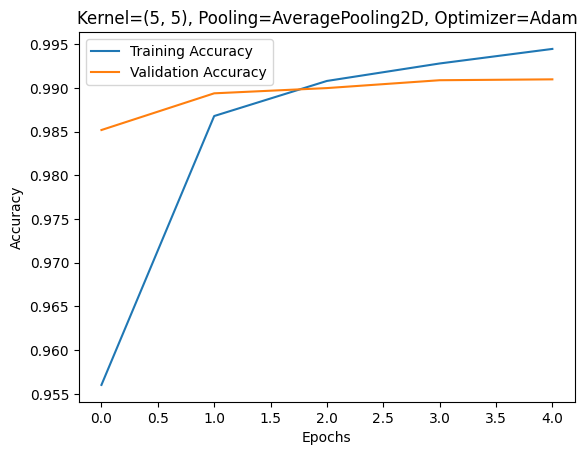

Training with kernel_size=(5, 5), pooling_type=AveragePooling2D, optimizer=Adam, epochs=100
Epoch 1/100
1875/1875 - 8s - 4ms/step - accuracy: 0.9564 - loss: 0.1432 - val_accuracy: 0.9883 - val_loss: 0.0390 - learning_rate: 0.0010
Epoch 2/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9867 - loss: 0.0435 - val_accuracy: 0.9909 - val_loss: 0.0315 - learning_rate: 0.0010
Epoch 3/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9901 - loss: 0.0310 - val_accuracy: 0.9918 - val_loss: 0.0231 - learning_rate: 0.0010
Epoch 4/100
1875/1875 - 6s - 3ms/step - accuracy: 0.9933 - loss: 0.0228 - val_accuracy: 0.9906 - val_loss: 0.0297 - learning_rate: 0.0010
Epoch 5/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9942 - loss: 0.0170 - val_accuracy: 0.9908 - val_loss: 0.0345 - learning_rate: 0.0010
Epoch 6/100
1875/1875 - 10s - 5ms/step - accuracy: 0.9956 - loss: 0.0152 - val_accuracy: 0.9912 - val_loss: 0.0286 - learning_rate: 0.0010
Epoch 7/100
1875/1875 - 5s - 3ms/step - accuracy: 0.9986 - loss: 0.0046 - val_a

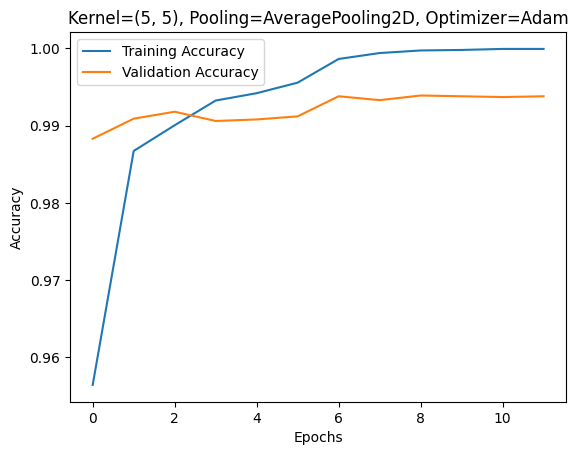

In [27]:
# Perform Comparisons
for kernel_size in kernel_sizes:
    for pooling_type in pooling_types:
        for optimizer_class in optimizers_to_compare:
            for epochs in epochs_list:
                print(f"Training with kernel_size={kernel_size}, pooling_type={pooling_type.__name__}, "
                      f"optimizer={optimizer_class.__name__}, epochs={epochs}")
                optimizer_instance = optimizer_class()  # Create a new instance of the optimizer
                model = build_model(kernel_size, pooling_type, optimizer_instance)
                history = model.fit(train_images, train_labels,
                                    epochs=epochs,
                                    validation_data=(test_images, test_labels),
                                    callbacks=callbacks,
                                    verbose=2)
                test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
                print(f"Test accuracy: {test_acc:.4f}")

                # Plot Accuracy
                plt.plot(history.history['accuracy'], label='Training Accuracy')
                plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
                plt.title(f"Kernel={kernel_size}, Pooling={pooling_type.__name__}, Optimizer={optimizer_class.__name__}")
                plt.xlabel('Epochs')
                plt.ylabel('Accuracy')
                plt.legend()
                plt.show()